<a href="https://colab.research.google.com/github/syaefulalam/sentimen-analysis/blob/master/sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sentimen analysis

Library

In [0]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Read Data**

In [0]:
!git clone https://github.com/syaefulalam/sentimen-analysis

fatal: destination path 'sentimen-analysis' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('sentimen-analysis/contoh sentimen.csv', sep=';')


In [0]:
data.head ()

,id,text,sentiment
0,"7,15601E+17",@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,"7,156E+17",@IndosatCare udah di DM yah,Positif
2,"7,04875E+17",@Telkomsel aku pakai loop kak :),Positif
3,"7,04875E+17",@rikawidjaya04 Terima kasih juga Kak Rika atas...,Positif
4,"7,13428E+17",@ndusell saya simpati tan,Positif


In [0]:
# Choose the column we will be using
data = data[['text','sentiment']]
len(data)

4294

In [0]:
data[:10]

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas...,Positif
4,@ndusell saya simpati tan,Positif
5,@telkomsel terima kasih penjelasannya mimin,Positif
6,"@indosatcare terima kasih ya, untuk informasinya.",Positif
7,@Telkomsel yess yess,Positif
8,@Telkomsel ok thanks,Positif
9,thanks @IndosatCare koneksi internet sudah nor...,Positif


In [0]:
# Bagi dataset menjadi data training dan testing
train, test = train_test_split(data,test_size = 0.2)
# Hapus sentiment yang netral
train = train[train.sentiment != "Neutral"]

train_pos = train[ train['sentiment'] == 'Positif']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negatif']
train_neg = train_neg['text']

In [0]:
train_pos

2893    Gerakan Bela Negara Akan Gelar Simposium Anti ...
65      @Telkomsel sudah saya DM. Terima kasih sebelum...
3202    warga aceh barat dukung program bela negara az...
3385    Panglima TNI Tak Keberatan Intelijen Kemenhan ...
20                 Super sekali adminya wkwk @IndosatCare
3216      Kemenhan Kader Bela Negara Capai skalanews via 
1723    @IndosatCare iya makasih jg fast response jwbn...
3195    Mahasiswa Undana Ikut Pendidikan Bela Negara P...
3056    Panglima TNI Intel Kemenhan Tak Akan Tumpang T...
3305    ekonomi dan pertanian itu termasuk dalam kateg...
4288    Mufti Wilayah Persekutuan Tidak Haramkan Pokem...
1617                     @Telkomsel aku pakai loop kak :)
114     @IndosatCare oke, makasih ya informasinya... S...
4190    Panglima TNI Hadiri Apel Gelar Nasional Bela N...
3047    Tujuh WNI disandera Abu Sayyaf Ryamizard Menha...
3262    DW Sampai Kementerian Pertahanan akan membangu...
3054       Ryamizard Tinjau Pasar Murah di Kemenhan Photo
2822          

In [0]:
#augment the stopwords with nonstandard twitter words
stopwords_set = set(stopwords.words("indonesian"))
stopwords_aug = {"ya","yak","iya","yg","ga","gak","gk","udh","sdh","udah","dah","nih","ini","deh","sih","dong","donk",
                 "sm","knp","utk","yaa","tdk","gini","gitu","bgt","gt","nya","kalo","cb","jg","jgn","gw","ge",
                 "sy","min","mas","mba","mbak","pak","kak","trus","trs","bs","bisa","aja","saja","no",
                 "w","g","gua","gue","emang","emg","wkwk","dr","kau","dg","gimana","apapun","apa",
                 "klo","yah","banget","pake","terus","krn","jadi","jd","mu","ku","si","hehe",
                 "tp","pa","lu","lo","lw","tw","tau","karna","kayak","ky","lg","untuk","tuk","dg","dgn"}
stopwords_all = stopwords_set.union(stopwords_aug)

In [0]:
#stopwords_set

Positive words


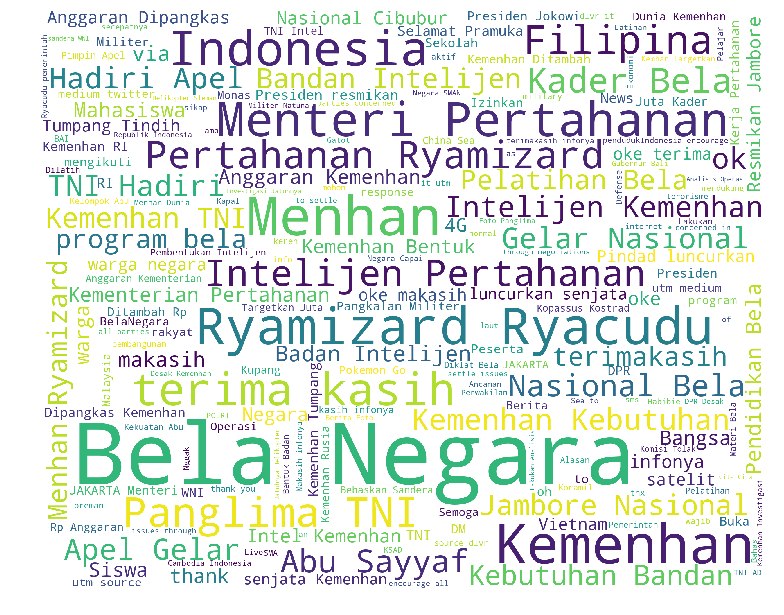

Negative words


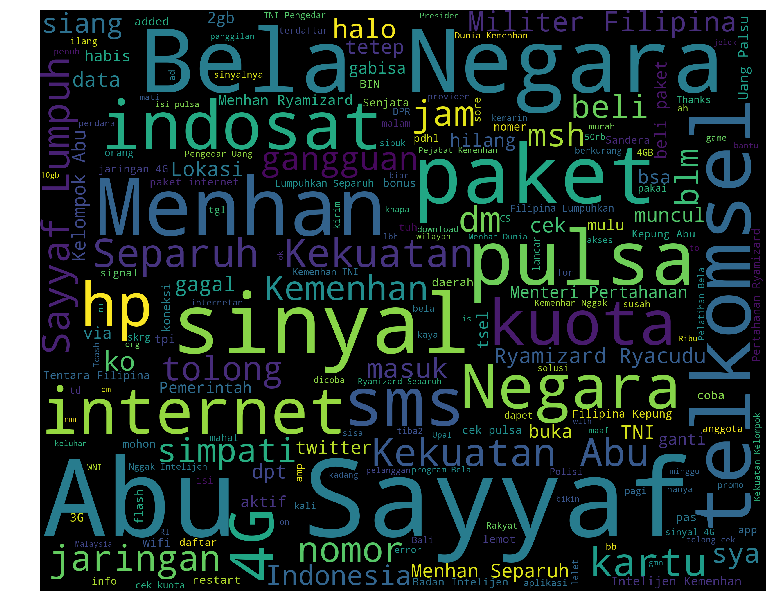

In [0]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_all,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [0]:
tweets = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets.append((words_cleaned,row.sentiment))

test_pos = test[ test['sentiment'] == 'Positif']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negatif']
test_neg = test_neg['text']

In [0]:
test_pos

3341    WNI Langganan Disandera Menhan akan Disiplinka...
2860    Menhan Hapus Ospek di Sekolah dengan Bela Negara 
2774    Pelajar di Jabar Akan Diedukasi Hukum agama da...
4222                 Markas Abu Sayyaf Berhasil Ditemukan
46             @IndosatCare okok secepat nya. Hatur nuhun
3853    Defense Minister Say Abu Sayyafs Half Strengt...
3383    Panglima TNI Tak Keberatan Kemenhan Bentuk Bad...
3921    President hails strategic partnership with Ind...
3296    BABINSA KORAMIL SLAWI MEMBERIKAN PEMBINAAN BEL...
4185    Berita Foto : Panglima TNI Hadiri Apel Gelar N...
2764    Korem Santiago Gelar Pembekalan Bela Negara di...
4198     Menhan Klaim Kesepakatan Trilateral Sudah Ber...
3502    InfoFinance Anggaran Lain Dipangkas Kemenhan D...
3153    Kirab Merah Putih Semarakkan Konferensi Intern...
56                       @telkomsel ok. Trmaksi mbak vina
1615           @IndosatCare iya nomernya masih itu. Mksh.
3334    Militer Amerika Serikat Bingung Dengan Pasukan...
3451    Kemenh

In [0]:
test_neg

996     @IndosatCare min kuota mentari indosat yg 3bla...
1009    1. MBanking141 dr telkomsel mencuri pulsa saya...
1205    Saya pengguna 082288362250; tidak bisa aktifka...
983     @IndosatCare motong pulsanya cepet penanganann...
2146    Sutiyoso Tak Tahu Kemenhan akan Bentuk Badan I...
4008            11.000 Tentara Filipina Kepung Abu Sayyaf
1062    @Telkomsel ada sms paket sukses, tp g sdar blm...
1513    @mandiricare maaf saya ingin menanyakan periha...
1086    @Telkomsel sudah saya lakukan tapi tetep nggak...
3673     Ryamizard bertemu Menhan Malaysia & Filipina,...
2065    Filipina Bilang ke Menhan Pak Ryamizard Tidur ...
964     Dear @IndosatCare, tadi malem saya coba aktifk...
2174    Samaji Worker Abdul Sattar Edhi Ke Intqal Per ...
3594    Menhan: Gempuran Militer Filipina Membuka Cela...
1403    @IndosatCare Masih belum bisa reg ket pulsa td...
1103    @Telkomsel sudah lebih 3 hari tapi belum ada l...
1096    @IndosatCare 557*8 hanya untuk sisa kuota buka...
1158    hari i

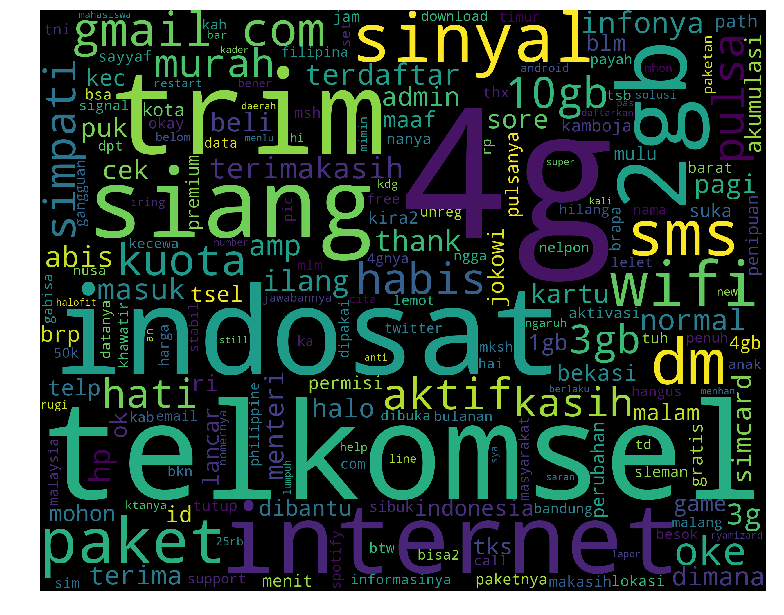

[Negatif]: 263/123 
[Positif]: 261/104 


In [0]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


wordcloud_draw(w_features)

# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negatif'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positif'): 
        pos_cnt = pos_cnt + 1
        
print('[Negatif]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positif]: %s/%s '  % (len(test_pos),pos_cnt))
